c:\Users\10789901\miniconda3\envs\learning\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Found 2610 images belonging to 3 classes.
Found 651 images belonging to 3 classes.
Epoch 1/500
81/81 [==============================] - 13s 58ms/step - loss: 1.9404 - accuracy: 0.4147 - val_loss: 0.8235 - val_accuracy: 0.6531
Epoch 2/500
81/81 [==============================] - 3s 36ms/step - loss: 1.0946 - accuracy: 0.4791 - val_loss: 0.8013 - val_accuracy: 0.6891
Epoch 3/500
81/81 [==============================] - 3s 36ms/step - loss: 0.9787 - accuracy: 0.5295 - val_loss: 0.7615 - val_accuracy: 0.7266
Epoch 4/500
81/81 [==============================] - 3s 36ms/step - loss: 0.9067 - accuracy: 0.5481 - val_loss: 0.7164 - val_accuracy: 0.7281
Epoch 5/500
81/81 [==============================] - 3s 35ms/step - loss: 0.8852 - accuracy: 0.5815 - val_loss: 0.6853 - val_accuracy: 0.7500
Epoch 6/500
81/81 [==============================] - 3s 35ms/step - loss: 0.8575 - accuracy: 0.5760 - val_loss: 0.6739 - val_accuracy: 0.7406
Epoch 7/500
81/81 [==============================] - 3s 35ms/ste

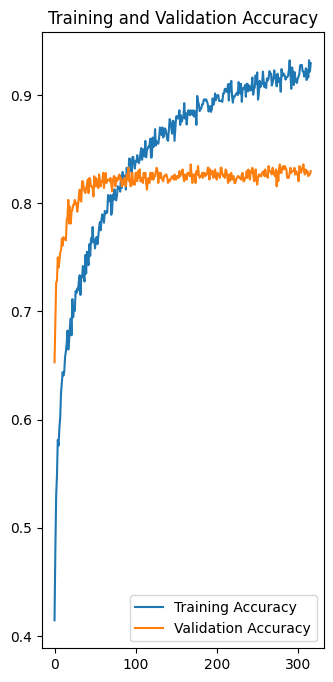

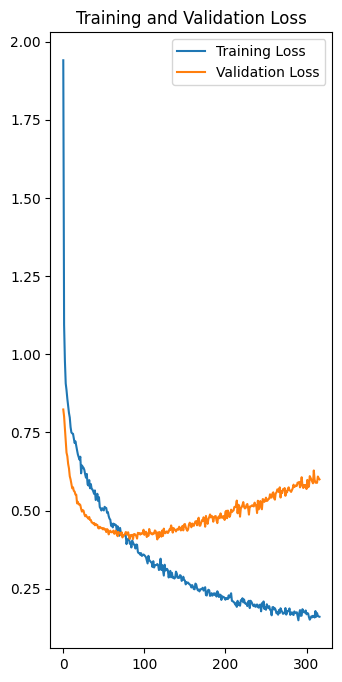

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 128, 128
num_classes = 3

src_path_train = r"your/directory"
src_path_valid = r"your/directory"


MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))






base_model = MobileNetV2_base_model

base_model.trainable = False

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200,verbose=1,restore_best_weights=True)


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    src_path_train,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    src_path_valid,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,callbacks=[early_stop],verbose = 1)

print(model.summary())
score = model.evaluate(validation_generator)
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

if(score[1]>0.70):    
  model.save("models/"+str(score[1])+"_model.h5")
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.savefig('images/'+str(score[1])+'_acc.png')
      
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('images/'+str(score[1])+'_loss.png')
tf.keras.utils.plot_model(model, to_file=r'your/directory', show_shapes=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
